In [ ]:
#need to install sklearn package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score

from scipy.spatial import ConvexHull,convex_hull_plot_2d

In [2]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [3]:
df = pd.read_csv("Downloads/carnivore-spotter-export3.csv")

In [4]:
cols = ['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Latitude', 'Longitude', 'Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs']
df.columns = cols

In [5]:
df = df[(df['Latitude']>minLat)&(df['Latitude']<maxLat)&(df['Longitude']>minLon)&(df['Longitude']<maxLon)]

In [6]:
df['Time_Seen']=pd.to_datetime(df.Time_Seen).copy()

In [7]:
df['Month']=df.Time_Seen.dt.month
df['Year'] = df.Time_Seen.dt.year

In [8]:
df = df.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Behavior','Time_Submitted',
       'Reaction_Desription', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs'],axis=1)
df.head()

,Time_Seen,Latitude,Longitude,Species,Month,Year
1,2019-08-06 13:15:00+00:00,47.683153,-122.127485,Coyote,8,2019
2,2019-09-09 13:30:00+00:00,47.603330,-122.210544,Cougar/Mountain Lion,9,2019
3,2019-08-01 16:45:00+00:00,47.676127,-122.328966,Coyote,8,2019
6,2019-09-19 14:45:00.501000+00:00,47.671392,-122.333005,Coyote,9,2019
7,2019-09-22 06:30:00+00:00,47.684725,-122.327508,Coyote,9,2019


In [9]:
summer = df[(df.Month>=6)&(df.Month<=8)] 
fall = df[(df.Month>=9)&(df.Month<=11)]
winter = df[(df.Month==12)|((df.Month==1)|(df.Month==2))]
spring = df[(df.Month>=3)&(df.Month<=5)]

In [10]:
df_2018 = df[df.Year==2018]
df_2019 = df[df.Year==2019]

In [11]:
#four season 2018 (81)
summer_18 = df_2018[(df_2018.Month>=6)&(df_2018.Month<=8)] 
fall_18 = df_2018[(df_2018.Month>=9)&(df_2018.Month<=11)]
winter_18 = df_2018[(df_2018.Month==12)|((df_2018.Month==1)|(df_2018.Month==2))]
spring_18 = df_2018[(df_2018.Month>=3)&(df_2018.Month<=5)]

In [12]:
#four season 2019(2481)
summer_19 = df_2019[(df_2019.Month>=6)&(df_2019.Month<=8)] 
fall_19 = df_2019[(df_2019.Month>=9)&(df_2019.Month<=11)]
winter_19 = df_2019[(df_2019.Month==12)|((df_2019.Month==1)|(df_2019.Month==2))]
spring_19 = df_2019[(df_2019.Month>=3)&(df_2019.Month<=5)]

In [13]:
#coyote 2018
coyo_sum18 = summer_18[summer_18.Species=='Coyote']
coyo_fall18 = fall_18[fall_18.Species=='Coyote']
coyo_winter18 = winter_18[winter_18.Species=='Coyote']
coyo_spring18 = spring_18[spring_18.Species=='Coyote']

In [14]:
#coyote 2019
coyo_sum19 = summer_19[summer_19.Species=='Coyote']
coyo_fall19 = fall_19[fall_19.Species=='Coyote']
coyo_winter19 = winter_19[winter_19.Species=='Coyote']
coyo_spring19 = spring_19[spring_19.Species=='Coyote']

In [15]:
#black bear 2018
b_sum18 = summer_18[summer_18.Species=='Black Bear']
b_fall18 = fall_18[fall_18.Species=='Black Bear']
b_winter18 = winter_18[winter_18.Species=='Black Bear']
b_spring18 = spring_18[spring_18.Species=='Black Bear']

In [16]:
#black bear 2019
b_sum19 = summer_19[summer_19.Species=='Black Bear']
b_fall19 = fall_19[fall_19.Species=='Black Bear']
b_winter19 = winter_19[winter_19.Species=='Black Bear']
b_spring19 = spring_19[spring_19.Species=='Black Bear']

In [17]:
#raccoon 2018
r_sum18 = summer_18[summer_18.Species=='Raccoon']
r_fall18 = fall_18[fall_18.Species=='Raccoon']
r_winter18 = winter_18[winter_18.Species=='Raccoon']
r_spring18 = spring_18[spring_18.Species=='Raccoon']

In [18]:
#raccoon 2019
r_sum19 = summer_19[summer_19.Species=='Raccoon']
r_fall19 = fall_19[fall_19.Species=='Raccoon']
r_winter19 = winter_19[winter_19.Species=='Raccoon']
r_spring19 = spring_19[spring_19.Species=='Raccoon']

In [19]:
#coyote,black bear, raccoon 2018
cbr_summer18 = summer_18[(summer_18.Species=='Coyote')|(summer_18.Species=='Black Bear')|(summer_18.Species=='Raccoon')]
cbr_fall18= fall_18[(fall_18.Species=='Coyote')|(fall_18.Species=='Black Bear')|(fall_18.Species=='Raccoon')]
cbr_winter18 = winter_18[(winter_18.Species=='Coyote')|(winter_18.Species=='Black Bear')|(winter_18.Species=='Raccoon')]
cbr_spring18 = spring_18[(spring_18.Species=='Coyote')|(spring_18.Species=='Black Bear')|(spring_18.Species=='Raccoon')]

In [20]:
#coyote,black bear,raccoon 2019
cbr_summer19 = summer_19[(summer_19.Species=='Coyote')|(summer_19.Species=='Black Bear')|(summer_19.Species=='Raccoon')]
cbr_fall19 = fall_19[(fall_19.Species=='Coyote')|(fall_19.Species=='Black Bear')|(fall_19.Species=='Raccoon')]
cbr_winter19 = winter_19[(winter_19.Species=='Coyote')|(winter_19.Species=='Black Bear')|(winter_19.Species=='Raccoon')]
cbr_spring19 = spring_19[(spring_19.Species=='Coyote')|(spring_19.Species=='Black Bear')|(spring_19.Species=='Raccoon')]

In [21]:
#coyote
coyo_sum = summer[summer.Species=='Coyote']
coyo_fall = fall[fall.Species=='Coyote']
coyo_winter = winter[winter.Species=='Coyote']
coyo_spring = spring[spring.Species=='Coyote']

In [22]:
#black bear
b_sum = summer[summer.Species=='Black Bear']
b_fall = fall[fall.Species=='Black Bear']
b_winter = winter[winter.Species=='Black Bear']
b_spring = spring[spring.Species=='Black Bear']

In [23]:
#raccoon
r_sum = summer[summer.Species=='Raccoon']
r_fall = fall[fall.Species=='Raccoon']
r_winter = winter[winter.Species=='Raccoon']
r_spring = spring[spring.Species=='Raccoon']

In [24]:
#coyote,black bear, raccoon
cbr_summer = summer[(summer.Species=='Coyote')|(summer.Species=='Black Bear')|(summer.Species=='Raccoon')]
cbr_fall = fall[(fall.Species=='Coyote')|(fall.Species=='Black Bear')|(fall.Species=='Raccoon')]
cbr_winter = winter[(winter.Species=='Coyote')|(winter.Species=='Black Bear')|(winter.Species=='Raccoon')]
cbr_spring = spring[(spring.Species=='Coyote')|(spring.Species=='Black Bear')|(spring.Species=='Raccoon')]

In [25]:
summer = summer.drop(['Time_Seen','Species','Month','Year'],axis=1)
fall = fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
winter = winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
spring = spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [26]:
coyo_sum = coyo_sum.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_fall = coyo_fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_winter = coyo_winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_spring = coyo_spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [27]:
b_sum=b_sum.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_fall=b_fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_winter=b_winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_spring=b_spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [28]:
r_sum=r_sum.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_fall=r_fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_winter=r_winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_spring=r_spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [29]:
cbr_summer=cbr_summer.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_fall=cbr_fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_winter=cbr_winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_spring=cbr_spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [30]:
summer_18 = summer_18.drop(['Time_Seen','Species','Month','Year'],axis=1)
fall_18 = fall_18.drop(['Time_Seen','Species','Month','Year'],axis=1)
winter_18 = winter_18.drop(['Time_Seen','Species','Month','Year'],axis=1)
spring_18 = spring_18.drop(['Time_Seen','Species','Month','Year'],axis=1)

coyo_sum18 = coyo_sum18.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_fall18 = coyo_fall18.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_winter18 = coyo_winter18.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_spring18 = coyo_spring18.drop(['Time_Seen','Species','Month','Year'],axis=1)

b_sum18=b_sum18.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_fall18=b_fall18.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_winter18=b_winter18.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_spring18=b_spring18.drop(['Time_Seen','Species','Month','Year'],axis=1)

r_sum18=r_sum18.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_fall18=r_fall18.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_winter18=r_winter18.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_spring18=r_spring18.drop(['Time_Seen','Species','Month','Year'],axis=1)

cbr_summer18 = cbr_summer18.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_fall18 = cbr_fall18.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_winter18 = cbr_winter18.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_spring18 = cbr_spring18.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [31]:
summer_19 = summer_19.drop(['Time_Seen','Species','Month','Year'],axis=1)
fall_19 = fall_19.drop(['Time_Seen','Species','Month','Year'],axis=1)
winter_19 = winter_19.drop(['Time_Seen','Species','Month','Year'],axis=1)
spring_19 = spring_19.drop(['Time_Seen','Species','Month','Year'],axis=1)


coyo_sum19 = coyo_sum19.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_fall19 = coyo_fall19.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_winter19 = coyo_winter19.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_spring19 = coyo_spring19.drop(['Time_Seen','Species','Month','Year'],axis=1)

b_sum19=b_sum19.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_fall19=b_fall19.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_winter19=b_winter19.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_spring19=b_spring19.drop(['Time_Seen','Species','Month','Year'],axis=1)

r_sum19=r_sum19.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_fall19=r_fall19.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_winter19=r_winter19.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_spring19=r_spring19.drop(['Time_Seen','Species','Month','Year'],axis=1)

cbr_summer19 = cbr_summer19.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_fall19 = cbr_fall19.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_winter19 = cbr_winter19.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_spring19 = cbr_spring19.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [32]:
#handle missing data if there is any
summer.fillna(method='bfill',inplace=True)
fall.fillna(method='bfill',inplace=True)
winter.fillna(method='bfill',inplace=True)
spring.fillna(method='bfill',inplace=True)

coyo_sum.fillna(method='bfill',inplace=True)
coyo_fall.fillna(method='bfill',inplace=True)
coyo_winter.fillna(method='bfill',inplace=True)
coyo_spring.fillna(method='bfill',inplace=True)

b_sum.fillna(method='bfill',inplace=True)
b_fall.fillna(method='bfill',inplace=True)
b_winter.fillna(method='bfill',inplace=True) #0sample
b_spring.fillna(method='bfill',inplace=True)

r_sum.fillna(method='bfill',inplace=True)
r_fall.fillna(method='bfill',inplace=True)
r_winter.fillna(method='bfill',inplace=True)
r_spring.fillna(method='bfill',inplace=True)

cbr_summer.fillna(method='bfill',inplace=True)
cbr_fall.fillna(method='bfill',inplace=True)
cbr_winter.fillna(method='bfill',inplace=True)
cbr_spring.fillna(method='bfill',inplace=True)

In [33]:
summer.head()

,Latitude,Longitude
1,47.683153,-122.127485
3,47.676127,-122.328966
9,47.674193,-122.393790
13,47.688450,-122.118364
15,47.754397,-122.365230


In [34]:
summer_scaled=StandardScaler().fit_transform(summer)
fall_scaled=StandardScaler().fit_transform(fall)
winter_scaled=StandardScaler().fit_transform(winter)
spring_scaled=StandardScaler().fit_transform(spring)

In [35]:
#coyote
coyo_summer_scaled=StandardScaler().fit_transform(coyo_sum)
coyo_fall_scaled=StandardScaler().fit_transform(coyo_fall)
coyo_winter_scaled=StandardScaler().fit_transform(coyo_winter)
coyo_spring_scaled=StandardScaler().fit_transform(coyo_spring)

In [36]:
#black bear
b_summer_scaled=StandardScaler().fit_transform(b_sum)
b_fall_scaled=StandardScaler().fit_transform(b_fall)
b_spring_scaled=StandardScaler().fit_transform(b_spring)
#no data point in winter

In [37]:
#raccoon
r_summer_scaled=StandardScaler().fit_transform(r_sum)
r_fall_scaled=StandardScaler().fit_transform(r_fall)
r_winter_scaled=StandardScaler().fit_transform(r_winter)
r_spring_scaled=StandardScaler().fit_transform(r_spring)

In [38]:
#cbr(coyote,black bear,raccoon)
cbr_summer_scaled=StandardScaler().fit_transform(cbr_summer)
cbr_fall_scaled=StandardScaler().fit_transform(cbr_fall)
cbr_winter_scaled=StandardScaler().fit_transform(cbr_winter)
cbr_spring_scaled=StandardScaler().fit_transform(cbr_spring)

In [39]:
#2018
summer18_scaled=StandardScaler().fit_transform(summer_18)
fall18_scaled=StandardScaler().fit_transform(fall_18)
winter18_scaled=StandardScaler().fit_transform(winter_18)
spring18_scaled=StandardScaler().fit_transform(spring_18)

coyo_summer18_scaled=StandardScaler().fit_transform(coyo_sum18)
coyo_fall18_scaled=StandardScaler().fit_transform(coyo_fall18)
coyo_winter18_scaled=StandardScaler().fit_transform(coyo_winter18)
#no coyote data point in spring 2018

b_summer18_scaled=StandardScaler().fit_transform(b_sum18)
b_fall18_scaled=StandardScaler().fit_transform(b_fall18)
#no black bear data point in winter 2018
b_spring18_scaled=StandardScaler().fit_transform(b_spring18)

r_summer18_scaled=StandardScaler().fit_transform(r_sum18)
r_fall18_scaled=StandardScaler().fit_transform(r_fall18)
#no raccoon data point in winter 2018
#no raccoon data point in spring 2018

cbr_summer18_scaled=StandardScaler().fit_transform(cbr_summer18)
cbr_fall18_scaled=StandardScaler().fit_transform(cbr_fall18)
cbr_winter18_scaled=StandardScaler().fit_transform(cbr_winter18)
cbr_spring18_scaled=StandardScaler().fit_transform(cbr_spring18)

In [40]:
#2019
summer19_scaled=StandardScaler().fit_transform(summer_19)
fall19_scaled=StandardScaler().fit_transform(fall_19)
winter19_scaled=StandardScaler().fit_transform(winter_19)
spring19_scaled=StandardScaler().fit_transform(spring_19)

coyo_summer19_scaled=StandardScaler().fit_transform(coyo_sum19)
coyo_fall19_scaled=StandardScaler().fit_transform(coyo_fall19)
coyo_winter19_scaled=StandardScaler().fit_transform(coyo_winter19)
coyo_spring19_scaled=StandardScaler().fit_transform(coyo_spring19)

b_summer19_scaled=StandardScaler().fit_transform(b_sum19)
b_fall19_scaled=StandardScaler().fit_transform(b_fall19)
#no data point in winter
b_spring19_scaled=StandardScaler().fit_transform(b_spring19)

r_summer19_scaled=StandardScaler().fit_transform(r_sum19)
r_fall19_scaled=StandardScaler().fit_transform(r_fall19)
r_winter19_scaled=StandardScaler().fit_transform(r_winter19)
r_spring19_scaled=StandardScaler().fit_transform(r_spring19)

cbr_summer19_scaled=StandardScaler().fit_transform(cbr_summer19)
cbr_fall19_scaled=StandardScaler().fit_transform(cbr_fall19)
cbr_winter19_scaled=StandardScaler().fit_transform(cbr_winter19)
cbr_spring19_scaled=StandardScaler().fit_transform(cbr_spring19)

In [ ]:
#use k-distance graph to estimate the epsilon value
#values use for the parameters are not yet optimal

In [41]:
db_summer = DBSCAN(eps=0.4,min_samples=10).fit(summer_scaled)
summer_labels = db_summer.labels_
realClusterNum_summer = len(set(summer_labels))-(1 if -1 in summer_labels else 0)
clusterNum_summer = len(set(summer_labels))
print("realclusterNum_summer",realClusterNum_summer)
print("clusterNum_summer",clusterNum_summer)

db_fall = DBSCAN(eps=0.35,min_samples=10).fit(fall_scaled)
fall_labels = db_fall.labels_
realClusterNum_fall = len(set(fall_labels))-(1 if -1 in fall_labels else 0)
clusterNum_fall = len(set(fall_labels))
print("realclusterNum_fall",realClusterNum_fall)
print("clusterNum_fall",clusterNum_fall)

db_winter = DBSCAN(eps=1,min_samples=10).fit(winter_scaled)
winter_labels = db_winter.labels_
realClusterNum_winter = len(set(winter_labels))-(1 if -1 in winter_labels else 0)
clusterNum_winter = len(set(winter_labels))
print("realclusterNum_winter",realClusterNum_winter)
print("clusterNum_winter",clusterNum_winter)

db_spring= DBSCAN(eps=1,min_samples=10).fit(spring_scaled)
spring_labels = db_spring.labels_
realClusterNum_spring = len(set(spring_labels))-(1 if -1 in spring_labels else 0)
clusterNum_spring = len(set(spring_labels))
print("realclusterNum_spring",realClusterNum_spring)
print("clusterNum_spring",clusterNum_spring)


realclusterNum_summer 3
clusterNum_summer 4
realclusterNum_fall 1
clusterNum_fall 2
realclusterNum_winter 1
clusterNum_winter 2
realclusterNum_spring 1
clusterNum_spring 2


In [42]:
#coyote
db_summer_coyo = DBSCAN(eps=0.55,min_samples=10).fit(coyo_summer_scaled)
coyo_summer_labels = db_summer_coyo.labels_
realClusterNum_summer_coyo = len(set(coyo_summer_labels))-(1 if -1 in coyo_summer_labels else 0)
clusterNum_summer_coyo = len(set(coyo_summer_labels))
print("realclusterNum_summer_coyo",realClusterNum_summer_coyo)
print("clusterNum_summer_coyo",clusterNum_summer_coyo)

db_fall_coyo = DBSCAN(eps=0.55,min_samples=10).fit(coyo_fall_scaled)
coyo_fall_labels = db_fall_coyo.labels_
realClusterNum_fall_coyo = len(set(coyo_fall_labels))-(1 if -1 in coyo_fall_labels else 0)
clusterNum_fall_coyo = len(set(coyo_fall_labels))
print("realclusterNum_fall_coyo",realClusterNum_fall_coyo)
print("clusterNum_fall_coyo",clusterNum_fall_coyo)

db_winter_coyo = DBSCAN(eps=1,min_samples=10).fit(coyo_winter_scaled)
coyo_winter_labels = db_winter_coyo.labels_
realClusterNum_winter_coyo = len(set(coyo_winter_labels))-(1 if -1 in coyo_winter_labels else 0)
clusterNum_winter_coyo = len(set(coyo_winter_labels))
print("realclusterNum_winter_coyo",realClusterNum_winter_coyo)
print("clusterNum_winter_coyo",clusterNum_winter_coyo)

db_spring_coyo= DBSCAN(eps=2,min_samples=10).fit(coyo_spring_scaled)
coyo_spring_labels = db_spring_coyo.labels_
realClusterNum_spring_coyo = len(set(coyo_spring_labels))-(1 if -1 in coyo_spring_labels else 0)
clusterNum_spring_coyo = len(set(coyo_spring_labels))
print("realclusterNum_spring",realClusterNum_spring_coyo)
print("clusterNum_spring",clusterNum_spring_coyo)

realclusterNum_summer_coyo 2
clusterNum_summer_coyo 3
realclusterNum_fall_coyo 2
clusterNum_fall_coyo 3
realclusterNum_winter_coyo 1
clusterNum_winter_coyo 2
realclusterNum_spring 1
clusterNum_spring 2


In [43]:
#black bear
db_summer_b = DBSCAN(eps=1.0,min_samples=10).fit(b_summer_scaled)
b_summer_labels = db_summer_b.labels_
realClusterNum_summer_b = len(set(b_summer_labels))-(1 if -1 in b_summer_labels else 0)
clusterNum_summer_b = len(set(b_summer_labels))
print("realclusterNum_summer_b",realClusterNum_summer_b)
print("clusterNum_summer_b",clusterNum_summer_b)

db_fall_b = DBSCAN(eps=0.8,min_samples=10).fit(b_fall_scaled)
b_fall_labels = db_fall_b.labels_
realClusterNum_fall_b = len(set(b_fall_labels))-(1 if -1 in b_fall_labels else 0)
clusterNum_fall_b = len(set(b_fall_labels))
print("realclusterNum_fall_b",realClusterNum_fall_b)
print("clusterNum_fall_b",clusterNum_fall_b)

db_spring_b= DBSCAN(eps=1.5,min_samples=10).fit(b_spring_scaled)
b_spring_labels = db_spring_b.labels_
realClusterNum_spring_b = len(set(b_spring_labels))-(1 if -1 in b_spring_labels else 0)
clusterNum_spring_b = len(set(b_spring_labels))
print("realclusterNum_spring_b",realClusterNum_spring_b)
print("clusterNum_spring_b",clusterNum_spring_b)


realclusterNum_summer_b 1
clusterNum_summer_b 2
realclusterNum_fall_b 1
clusterNum_fall_b 2
realclusterNum_spring_b 1
clusterNum_spring_b 2


In [44]:
#raccoon
db_summer_r = DBSCAN(eps=1,min_samples=10).fit(r_summer_scaled)
r_summer_labels = db_summer_r.labels_
realClusterNum_summer_r = len(set(r_summer_labels))-(1 if -1 in r_summer_labels else 0)
clusterNum_summer_r = len(set(r_summer_labels))
print("realclusterNum_summer_r",realClusterNum_summer_r)
print("clusterNum_summer_r",clusterNum_summer_r)

db_fall_r = DBSCAN(eps=0.8,min_samples=10).fit(r_fall_scaled)
r_fall_labels = db_fall_r.labels_
realClusterNum_fall_r = len(set(r_fall_labels))-(1 if -1 in r_fall_labels else 0)
clusterNum_fall_r = len(set(r_fall_labels))
print("realclusterNum_fall_r",realClusterNum_fall_r)
print("clusterNum_fall_r",clusterNum_fall_r)

db_winter_r = DBSCAN(eps=1,min_samples=10).fit(r_winter_scaled)
r_winter_labels = db_winter_r.labels_
realClusterNum_winter_r = len(set(r_winter_labels))-(1 if -1 in r_winter_labels else 0)
clusterNum_winter_r = len(set(r_winter_labels))
print("realclusterNum_winter_r",realClusterNum_winter_r)
print("clusterNum_winter_r",clusterNum_winter_r)

db_spring_r= DBSCAN(eps=3.5,min_samples=3).fit(r_spring_scaled)
r_spring_labels = db_spring_r.labels_
realClusterNum_spring_r = len(set(r_spring_labels))-(1 if -1 in r_spring_labels else 0)
clusterNum_spring_r = len(set(r_spring_labels))
print("realclusterNum_spring_r",realClusterNum_spring_r)
print("clusterNum_spring_r",clusterNum_spring_r)

realclusterNum_summer_r 1
clusterNum_summer_r 2
realclusterNum_fall_r 1
clusterNum_fall_r 2
realclusterNum_winter_r 1
clusterNum_winter_r 2
realclusterNum_spring_r 1
clusterNum_spring_r 1


In [45]:
#cbr
db_summer_cbr = DBSCAN(eps=0.6,min_samples=10).fit(cbr_summer_scaled)
cbr_summer_labels = db_summer_cbr.labels_
realClusterNum_summer_cbr = len(set(cbr_summer_labels))-(1 if -1 in cbr_summer_labels else 0)
clusterNum_summer_cbr = len(set(cbr_summer_labels))
print("realclusterNum_summer_cbr",realClusterNum_summer_cbr)
print("clusterNum_summer_cbr",clusterNum_summer_cbr)

db_fall_cbr = DBSCAN(eps=0.5,min_samples=10).fit(r_fall_scaled)
cbr_fall_labels = db_fall_cbr.labels_
realClusterNum_fall_cbr = len(set(cbr_fall_labels))-(1 if -1 in cbr_fall_labels else 0)
clusterNum_fall_cbr = len(set(cbr_fall_labels))
print("realclusterNum_fall_cbr",realClusterNum_fall_cbr)
print("clusterNum_fall_cbr",clusterNum_fall_cbr)

db_winter_cbr = DBSCAN(eps=1.55,min_samples=10).fit(r_winter_scaled)
cbr_winter_labels = db_winter_cbr.labels_
realClusterNum_winter_cbr = len(set(cbr_winter_labels))-(1 if -1 in cbr_winter_labels else 0)
clusterNum_winter_cbr = len(set(cbr_winter_labels))
print("realclusterNum_winter_cbr",realClusterNum_winter_cbr)
print("clusterNum_winter_cbr",clusterNum_winter_cbr)

db_spring_cbr= DBSCAN(eps=1.25,min_samples=10).fit(cbr_spring_scaled)
cbr_spring_labels = db_spring_cbr.labels_
realClusterNum_spring_cbr = len(set(cbr_spring_labels))-(1 if -1 in cbr_spring_labels else 0)
clusterNum_spring_cbr = len(set(cbr_spring_labels))
print("realclusterNum_spring_cbr",realClusterNum_spring_cbr)
print("clusterNum_spring_cbr",clusterNum_spring_cbr)



realclusterNum_summer_cbr 3
clusterNum_summer_cbr 4
realclusterNum_fall_cbr 3
clusterNum_fall_cbr 4
realclusterNum_winter_cbr 1
clusterNum_winter_cbr 2
realclusterNum_spring_cbr 1
clusterNum_spring_cbr 2


In [46]:
#2018
db_summer18 = DBSCAN(eps=1,min_samples=3).fit(summer18_scaled)
summer18_labels = db_summer18.labels_
realClusterNum_summer18 = len(set(summer18_labels))-(1 if -1 in summer18_labels else 0)
clusterNum_summer18 = len(set(summer18_labels))
print("realclusterNum_summer18",realClusterNum_summer18)
print("clusterNum_summer18",clusterNum_summer18)

db_fall18 = DBSCAN(eps=0.5,min_samples=3).fit(fall18_scaled)
fall18_labels = db_fall18.labels_
realClusterNum_fall18 = len(set(fall18_labels))-(1 if -1 in fall18_labels else 0)
clusterNum_fall18 = len(set(fall18_labels))
print("realclusterNum_fall18",realClusterNum_fall18)
print("clusterNum_fall18",clusterNum_fall18)

db_winter18 = DBSCAN(eps=2,min_samples=3).fit(winter18_scaled)
winter18_labels = db_winter18.labels_
realClusterNum_winter18 = len(set(winter18_labels))-(1 if -1 in winter18_labels else 0)
clusterNum_winter18 = len(set(winter18_labels))
print("realclusterNum_winter18",realClusterNum_winter18)
print("clusterNum_winter18",clusterNum_winter18)

db_spring18= DBSCAN(eps=1.5,min_samples=3).fit(spring18_scaled)
spring18_labels = db_spring18.labels_
realClusterNum_spring18 = len(set(spring18_labels))-(1 if -1 in spring18_labels else 0)
clusterNum_spring18 = len(set(spring18_labels))
print("realclusterNum_spring18",realClusterNum_spring18)
print("clusterNum_spring18",clusterNum_spring18)


realclusterNum_summer18 2
clusterNum_summer18 2
realclusterNum_fall18 4
clusterNum_fall18 5
realclusterNum_winter18 1
clusterNum_winter18 1
realclusterNum_spring18 1
clusterNum_spring18 2


In [47]:
y_pred_summer = db_summer.fit_predict(summer_scaled)
y_pred_fall = db_fall.fit_predict(fall_scaled)
y_pred_winter = db_winter.fit_predict(winter_scaled)
y_pred_spring = db_spring.fit_predict(spring_scaled)

In [48]:
#coyote
y_pred_summer_coyo = db_summer_coyo.fit_predict(coyo_summer_scaled)
y_pred_fall_coyo = db_fall_coyo.fit_predict(coyo_fall_scaled)
y_pred_winter_coyo = db_winter_coyo.fit_predict(coyo_winter_scaled)
y_pred_spring_coyo = db_spring_coyo.fit_predict(coyo_spring_scaled)

In [49]:
#black bear
y_pred_summer_b = db_summer_b.fit_predict(b_summer_scaled)
y_pred_fall_b= db_fall_b.fit_predict(b_fall_scaled)
y_pred_spring_b = db_spring_b.fit_predict(b_spring_scaled)

In [50]:
#raccoon
y_pred_summer_r = db_summer_r.fit_predict(r_summer_scaled)
y_pred_fall_r= db_fall_r.fit_predict(r_fall_scaled)
y_pred_winter_r = db_winter_r.fit_predict(r_winter_scaled)
y_pred_spring_r = db_spring_r.fit_predict(r_spring_scaled)

In [51]:
#cbr
y_pred_summer_cbr = db_summer_cbr.fit_predict(cbr_summer_scaled)
y_pred_fall_cbr= db_fall_cbr.fit_predict(cbr_fall_scaled)
y_pred_winter_cbr = db_winter_cbr.fit_predict(cbr_winter_scaled)
y_pred_spring_cbr = db_spring_cbr.fit_predict(cbr_spring_scaled)

In [52]:
#2018
y_pred_summer18 = db_summer18.fit_predict(summer18_scaled)
y_pred_fall18 = db_fall18.fit_predict(fall18_scaled)
y_pred_winter18 = db_winter18.fit_predict(winter18_scaled)
y_pred_spring18 = db_spring18.fit_predict(spring18_scaled)

In [115]:

def clusterSize(clus):
    if(len(clus)<3):
        plt.plot(clus[:,0],clus[:,1],'.')
        print("# of data points:",len(clus))
        print('This cluster does not have enought data points to make a convex hull')
        print('------------------------------------------------------')
        
    else:
        hull = ConvexHull(clus)
        plt.plot(clus[:,0],clus[:,1],'.')
        for simplex in hull.simplices:
            plt.plot(clus[simplex,0],clus[simplex,1],'k-')
        plt.plot(clus[hull.vertices[0],0],clus[hull.vertices[0],1],'ro')
        print("# of data points:",len(clus))
        print("cluster perimeter(hull.area):",hull.area)
        print("cluster area(hull.volume):",hull.volume)
        print('------------------------------------------------------')

Text(0.5, 1.0, 'Winter')

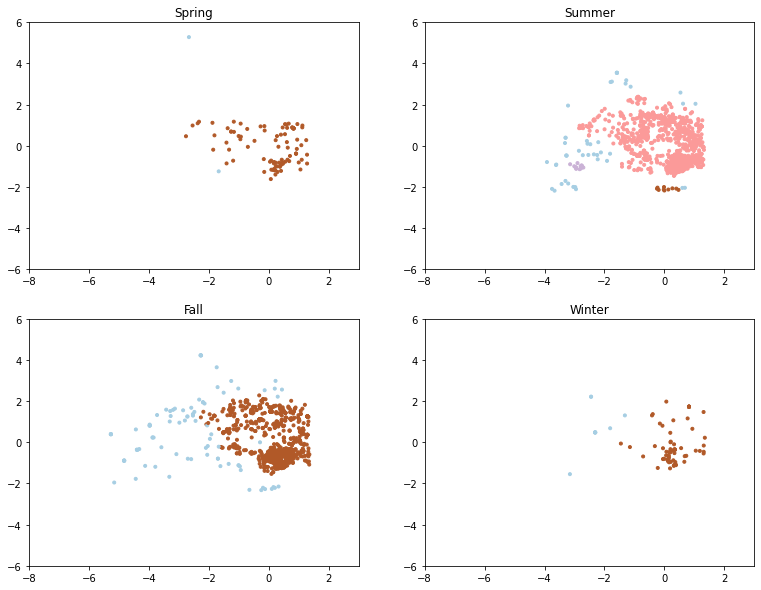

In [114]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(spring_scaled[:,0],spring_scaled[:,1],c=y_pred_spring,cmap='Paired',marker='.')
axs[0,0].set_title('Spring')
axs[0,1].scatter(summer_scaled[:,0],summer_scaled[:,1],c=y_pred_summer,cmap='Paired',marker='.')
axs[0,1].set_title('Summer')
axs[1,0].scatter(fall_scaled[:,0],fall_scaled[:,1],c=y_pred_fall,cmap='Paired',marker='.')
axs[1,0].set_title('Fall')
axs[1,1].scatter(winter_scaled[:,0],winter_scaled[:,1],c=y_pred_winter,cmap='Paired',marker='.')
axs[1,1].set_title('Winter')


In [54]:
#seasonal clusters area analysis
spring_clus = [spring_scaled[spring_labels==i] for i in range(realClusterNum_spring)]
summer_clus = [summer_scaled[summer_labels == i] for i in range(realClusterNum_summer)]
fall_clus = [fall_scaled[fall_labels==i] for i in range(realClusterNum_fall)]
winter_clus = [winter_scaled[winter_labels==i] for i in range(realClusterNum_winter)]


# of data points: 93
cluster perimeter(hull.area): 11.183789650769162
cluster area(hull.volume): 8.04791481547003
------------------------------------------------------


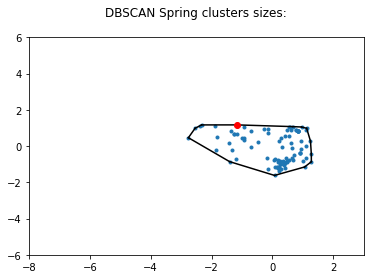

In [117]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Spring clusters sizes:\n')
for i in spring_clus:
    clusterSize(i)

# of data points: 1045
cluster perimeter(hull.area): 12.485435846025778
cluster area(hull.volume): 11.281032421392114
------------------------------------------------------
# of data points: 14
cluster perimeter(hull.area): 1.1124902518998023
cluster area(hull.volume): 0.07429919199675727
------------------------------------------------------
# of data points: 10
cluster perimeter(hull.area): 1.5307670657314425
cluster area(hull.volume): 0.08015939237078717
------------------------------------------------------


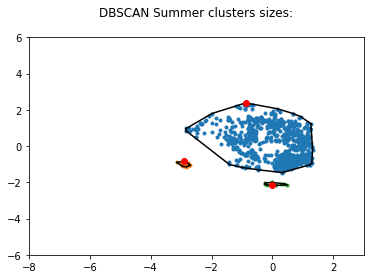

In [118]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Summer clusters sizes:\n')
for i in summer_clus:
    clusterSize(i)

# of data points: 1199
cluster perimeter(hull.area): 11.890605916925661
cluster area(hull.volume): 9.925787629045697
------------------------------------------------------


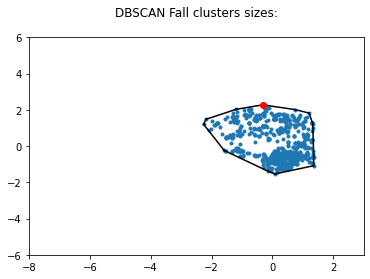

In [119]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Fall clusters sizes:\n')
for i in fall_clus:
    clusterSize(i)

# of data points: 70
cluster perimeter(hull.area): 9.35510420653677
cluster area(hull.volume): 6.006979308026491
------------------------------------------------------


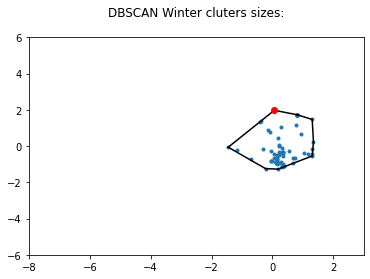

In [120]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Winter cluters sizes:\n')
for i in winter_clus:
    clusterSize(i)

Text(0.5, 1.0, 'Winter coyote')

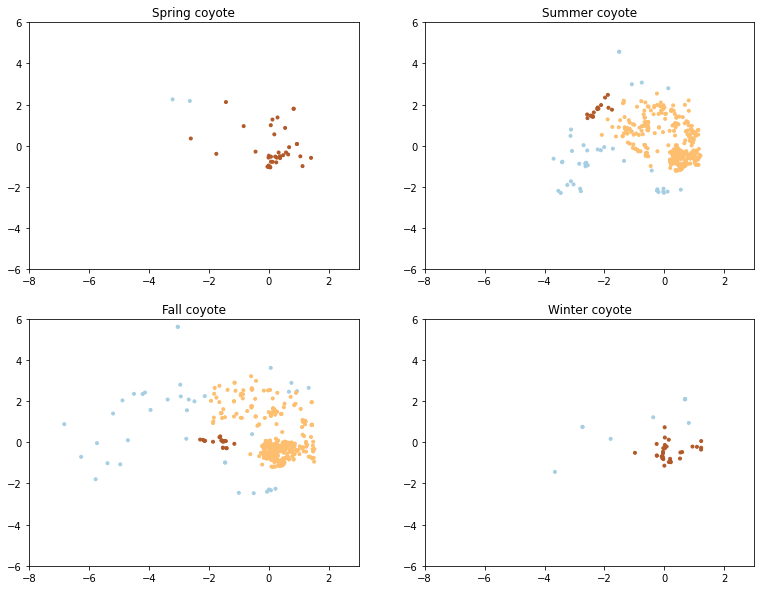

In [123]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(coyo_spring_scaled[:,0],coyo_spring_scaled[:,1],c=y_pred_spring_coyo,cmap='Paired',marker='.')
axs[0,0].set_title('Spring coyote')
axs[0,1].scatter(coyo_summer_scaled[:,0],coyo_summer_scaled[:,1],c=y_pred_summer_coyo,cmap='Paired',marker='.')
axs[0,1].set_title('Summer coyote')
axs[1,0].scatter(coyo_fall_scaled[:,0],coyo_fall_scaled[:,1],c=y_pred_fall_coyo,cmap='Paired',marker='.')
axs[1,0].set_title('Fall coyote')
axs[1,1].scatter(coyo_winter_scaled[:,0],coyo_winter_scaled[:,1],c=y_pred_winter_coyo,cmap='Paired',marker='.')
axs[1,1].set_title('Winter coyote')


In [124]:
coyo_spring_clus = [coyo_spring_scaled[coyo_spring_labels == i] for i in range(realClusterNum_spring_coyo)]
coyo_summer_clus = [coyo_summer_scaled[coyo_summer_labels == i] for i in range(realClusterNum_summer_coyo)]
coyo_fall_clus = [coyo_fall_scaled[coyo_fall_labels == i] for i in range(realClusterNum_fall_coyo)]
coyo_winter_clus = [coyo_winter_scaled[coyo_winter_labels == i] for i in range(realClusterNum_winter_coyo)]

# of data points: 38
cluster perimeter(hull.area): 11.477631166508562
cluster area(hull.volume): 8.867853152892472
------------------------------------------------------


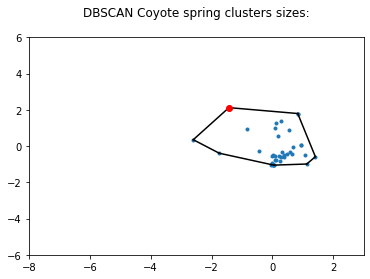

In [125]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Coyote spring clusters sizes:\n')
for i in coyo_spring_clus:
    clusterSize(i)

# of data points: 463
cluster perimeter(hull.area): 11.179089692952347
cluster area(hull.volume): 8.876321127089591
------------------------------------------------------
# of data points: 16
cluster perimeter(hull.area): 3.00387255001761
cluster area(hull.volume): 0.4006723600606207
------------------------------------------------------


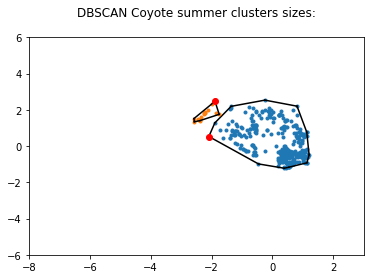

In [126]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Coyote summer clusters sizes:\n')
for i in coyo_summer_clus:
    clusterSize(i)

# of data points: 639
cluster perimeter(hull.area): 12.722737370991714
cluster area(hull.volume): 11.183427594688691
------------------------------------------------------
# of data points: 20
cluster perimeter(hull.area): 2.600299731625286
cluster area(hull.volume): 0.3227834475575531
------------------------------------------------------


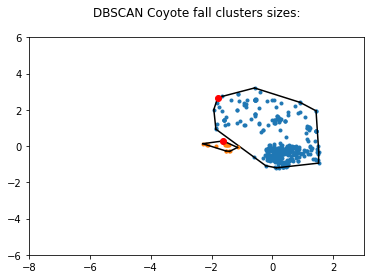

In [127]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Coyote fall clusters sizes:\n')
for i in coyo_fall_clus:
    clusterSize(i)

# of data points: 32
cluster perimeter(hull.area): 6.007052665281002
cluster area(hull.volume): 2.3094848916070974
------------------------------------------------------


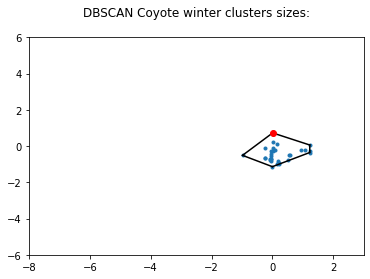

In [128]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Coyote winter clusters sizes:\n')
for i in coyo_winter_clus:
    clusterSize(i)

Text(0.5, 1.0, 'Winter black bear')

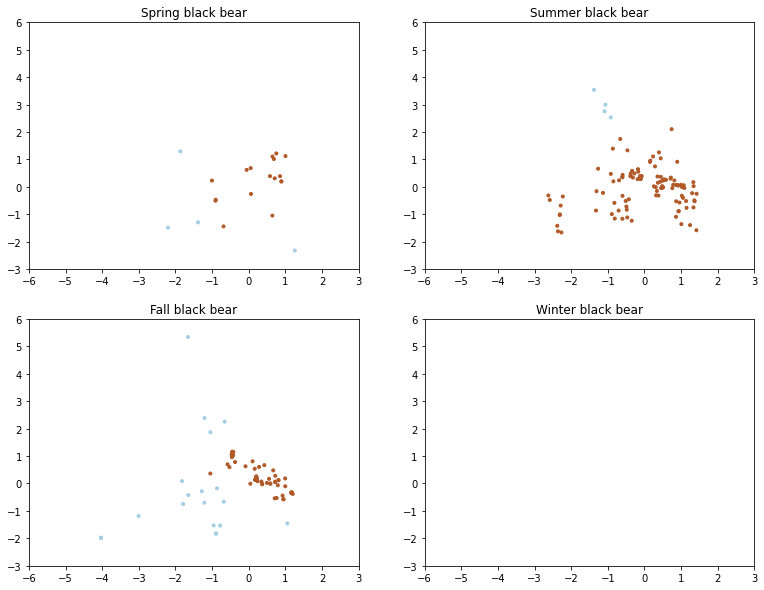

In [73]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(b_spring_scaled[:,0],b_spring_scaled[:,1],c=y_pred_spring_b,cmap='Paired',marker='.')
axs[0,0].set_title('Spring black bear')
axs[0,1].scatter(b_summer_scaled[:,0],b_summer_scaled[:,1],c=y_pred_summer_b,cmap='Paired',marker='.')
axs[0,1].set_title('Summer black bear')
axs[1,0].scatter(b_fall_scaled[:,0],b_fall_scaled[:,1],c=y_pred_fall_b,cmap='Paired',marker='.')
axs[1,0].set_title('Fall black bear')
axs[1,1].set_title('Winter black bear')

In [74]:
b_spring_clus = [b_spring_scaled[b_spring_labels==i] for i in range(realClusterNum_spring_b)]
b_summer_clus = [b_summer_scaled[b_summer_labels == i] for i in range(realClusterNum_summer_b)]
b_fall_clus = [b_fall_scaled[b_fall_labels==i] for i in range(realClusterNum_fall_b)]

# of data points: 17
cluster perimeter(hull.area): 7.573871749009534
cluster area(hull.volume): 3.479021738051089
------------------------------------------------------


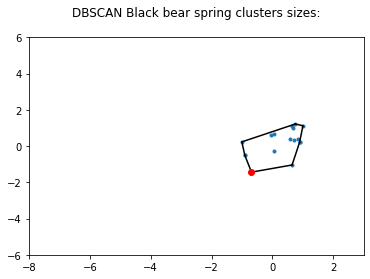

In [129]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Black bear spring clusters sizes:\n')
for i in b_spring_clus:
    clusterSize(i)

# of data points: 111
cluster perimeter(hull.area): 13.189369606218623
cluster area(hull.volume): 11.148455409916632
------------------------------------------------------


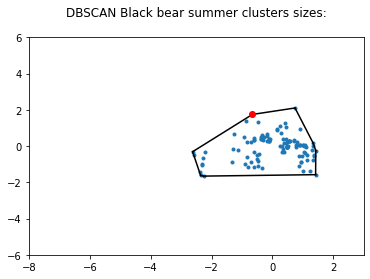

In [130]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Black bear summer clusters sizes:\n')
for i in b_summer_clus:
    clusterSize(i)

# of data points: 91
cluster perimeter(hull.area): 5.885341658598565
cluster area(hull.volume): 1.8978968690387032
------------------------------------------------------


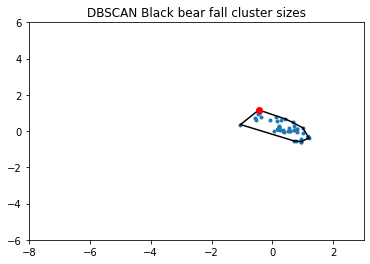

In [131]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Black bear fall cluster sizes')
for i in b_fall_clus:
    clusterSize(i)

Text(0.5, 1.0, 'Winter raccoon')

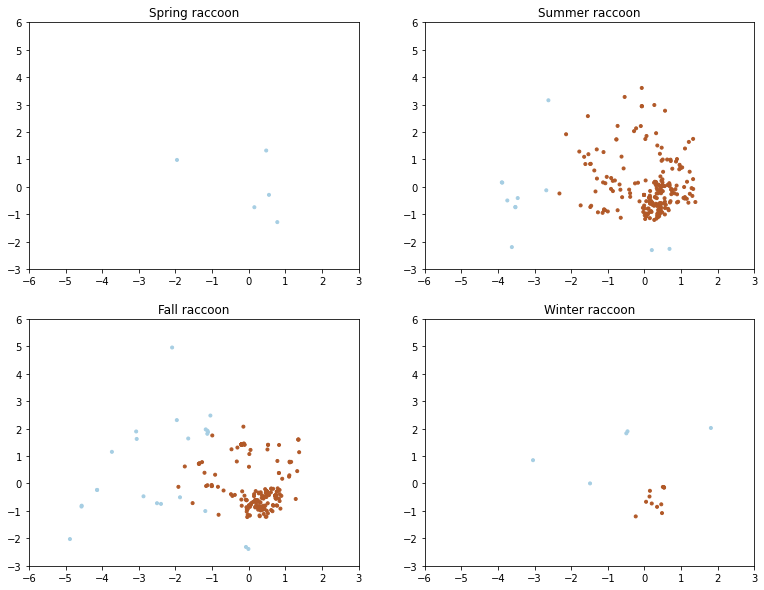

In [78]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(r_spring_scaled[:,0],r_spring_scaled[:,1],c=y_pred_spring_r,cmap='Paired',marker='.')
axs[0,0].set_title('Spring raccoon')
axs[0,1].scatter(r_summer_scaled[:,0],r_summer_scaled[:,1],c=y_pred_summer_r,cmap='Paired',marker='.')
axs[0,1].set_title('Summer raccoon')
axs[1,0].scatter(r_fall_scaled[:,0],r_fall_scaled[:,1],c=y_pred_fall_r,cmap='Paired',marker='.')
axs[1,0].set_title('Fall raccoon')
axs[1,1].scatter(r_winter_scaled[:,0],r_winter_scaled[:,1],c=y_pred_winter_r,cmap='Paired',marker='.')
axs[1,1].set_title('Winter raccoon')


In [79]:
r_spring_clus = [r_spring_scaled[r_spring_labels==i] for i in range(realClusterNum_spring_r)]
r_summer_clus = [r_summer_scaled[r_summer_labels == i] for i in range(realClusterNum_summer_r)]
r_fall_clus = [r_fall_scaled[r_fall_labels==i] for i in range(realClusterNum_fall_r)]
r_winter_clus = [r_winter_scaled[r_winter_labels==i] for i in range(realClusterNum_winter_r)]

17
17


# of data points: 5
cluster perimeter(hull.area): 8.639425652992585
cluster area(hull.volume): 3.2282597471182144
------------------------------------------------------


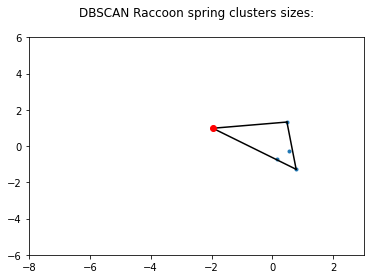

In [132]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Raccoon spring clusters sizes:\n')
for i in r_spring_clus:
    clusterSize(i)

# of data points: 221
cluster perimeter(hull.area): 13.602034302342917
cluster area(hull.volume): 13.163319435856016
------------------------------------------------------


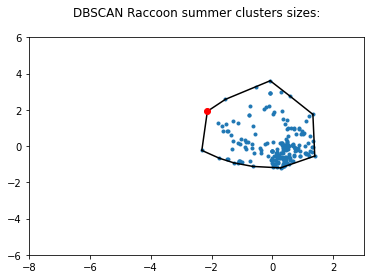

In [133]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Raccoon summer clusters sizes:\n')
for i in r_summer_clus:
    clusterSize(i)

# of data points: 244
cluster perimeter(hull.area): 10.638954220557663
cluster area(hull.volume): 8.405735619507722
------------------------------------------------------


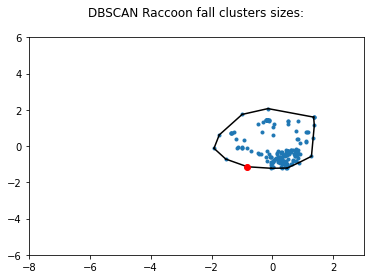

In [134]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Raccoon fall clusters sizes:\n')
for i in r_fall_clus:
    clusterSize(i)

# of data points: 12
cluster perimeter(hull.area): 3.093623163689356
cluster area(hull.volume): 0.494567054972967
------------------------------------------------------


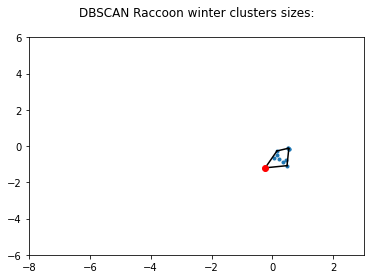

In [135]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('DBSCAN Raccoon winter clusters sizes:\n')
for i in r_winter_clus:
    clusterSize(i)

Text(0.5, 1.0, 'Winter coyote,black bear,raccoon')

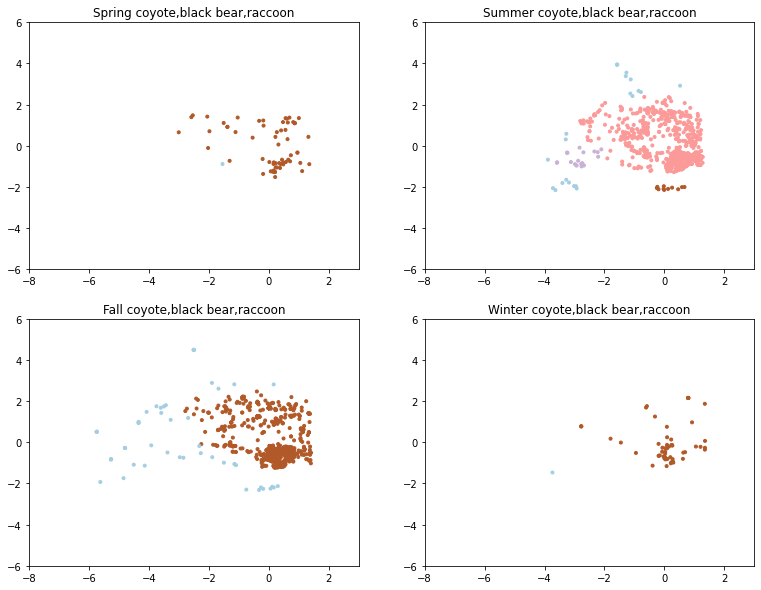

In [136]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(cbr_spring_scaled[:,0],cbr_spring_scaled[:,1],c=y_pred_spring_cbr,cmap='Paired',marker='.')
axs[0,0].set_title('Spring coyote,black bear,raccoon')
axs[0,1].scatter(cbr_summer_scaled[:,0],cbr_summer_scaled[:,1],c=y_pred_summer_cbr,cmap='Paired',marker='.')
axs[0,1].set_title('Summer coyote,black bear,raccoon')
axs[1,0].scatter(cbr_fall_scaled[:,0],cbr_fall_scaled[:,1],c=y_pred_fall_cbr,cmap='Paired',marker='.')
axs[1,0].set_title('Fall coyote,black bear,raccoon')
axs[1,1].scatter(cbr_winter_scaled[:,0],cbr_winter_scaled[:,1],c=y_pred_winter_cbr,cmap='Paired',marker='.')
axs[1,1].set_title('Winter coyote,black bear,raccoon')


Text(0.5, 1.0, 'Winter 2018')

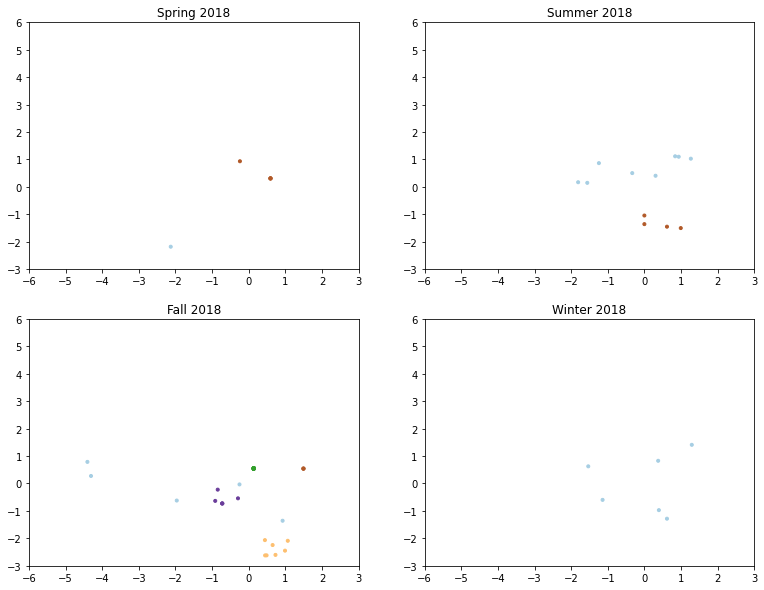

In [89]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(spring18_scaled[:,0],spring18_scaled[:,1],c=y_pred_spring18,cmap='Paired',marker='.')
axs[0,0].set_title('Spring 2018')
axs[0,1].scatter(summer18_scaled[:,0],summer18_scaled[:,1],c=y_pred_summer18,cmap='Paired',marker='.')
axs[0,1].set_title('Summer 2018')
axs[1,0].scatter(fall18_scaled[:,0],fall18_scaled[:,1],c=y_pred_fall18,cmap='Paired',marker='.')
axs[1,0].set_title('Fall 2018')
axs[1,1].scatter(winter18_scaled[:,0],winter18_scaled[:,1],c=y_pred_winter18,cmap='Paired',marker='.')
axs[1,1].set_title('Winter 2018')